## Analyze Supermarket Data Across the Country - Company XYZ.

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

In [1]:
## Import all required libraries 

In [2]:
import pandas as pd 
import numpy as np
import os
import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
os.chdir("C:\\Users\\Halima\\Downloads\\Data Analytics VI\\Data-Analysis-Project-main") #My current working directory

### Step 1 - Loading the Dataset

In [3]:
##Using glob to match the pattern "csv"

In [4]:
extension = '.csv'
df = [i for i in glob.glob("*{extension}/")]

In [5]:
Abuja_Branch = pd.read_csv(r'C:\Users\Halima\Downloads\Data Analytics VI\Data-Analysis-Project-main\Abuja_Branch.csv')
Lagos_Branch = pd.read_csv(r'C:\Users\Halima\Downloads\Data Analytics VI\Data-Analysis-Project-main\Lagos_Branch.csv')
Port_Harcourt_Branch = pd.read_csv(r'C:\Users\Halima\Downloads\Data Analytics VI\Data-Analysis-Project-main\Port_Harcourt_Branch.csv')

In [7]:
dfs = [Abuja_Branch, Lagos_Branch, Port_Harcourt_Branch]

NameError: name 'Abuja_Branch' is not defined

In [6]:
##Concatenating all the datasets together and exporting them to a CSV
all_data = pd.concat(dfs)
all_data.to_csv('all_data.csv')

NameError: name 'dfs' is not defined

In [8]:
##Read the CSV file 
pd.read_csv('all_data.csv')

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,323,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
996,324,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
997,325,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
998,326,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9


### Step 2 - Data Exploration 

In [9]:
## Viewing first few rows of the dataset 
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [10]:
## Inspecting the number of rows and columns present in the data
print(all_data.shape) 

(1000, 17)


There is 1000 rows and 17 columns in the data 

In [11]:
## Generating the names of the columns
print(all_data.columns) 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


The names of the columns are as follows: Invoice ID, Branch, City, Customer type Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income and Rating.

In [12]:
## Exploring the statistical summary 
all_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


I have observed that due to presence of large numbers or outliers, it caused gross income and cogs to skew and tax (5%) is also skewed due to outliers. 
There is a high standard deviations across all column which indicates that the data widely spread.  


In [13]:
## Treating missing values
pd.isnull(all_data).sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There is no missing values in the data 

In [14]:
## Checking data information
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Time and Data column is an object datatype not datetime

### Step 3 - Dealing with DateTime

In [15]:
## Converting Date column to DateTime 
all_data["Date"] = pd.to_datetime(all_data["Date"])

In [16]:
## Checking the datatype to confirm the conversion 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [67]:
## Converting Time column to DateTime
all_data["Time"] = pd.to_datetime(all_data["Time"])

In [18]:
## Checking the datatype to confirm the conversion 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [19]:
## Extracting the Day feature from the Date-column and Save to a new column
all_data['Day'] = all_data.Date.dt.day

In [20]:
## Extracting the Month feature from the Date-column and Save to a new column 
all_data['Month'] = all_data.Date.dt.month

In [21]:
## Extracting the Year feature from the Date-column and Save to a new column 
all_data['Year'] = all_data.Date.dt.year
all_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-06-23 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-06-23 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-06-23 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-06-23 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-06-23 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019


In [22]:
## Extracting the Hour feature from the Time-column and Save to a new column 
all_data['Hour'] = all_data.Time.dt.hour
all_data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-06-23 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-06-23 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-06-23 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-06-23 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-06-23 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


In [23]:
## Finding the numbers of unique hours of sales
all_data['Hour'].nunique()

11

In [24]:
## Generating an array of the hours
np.unique(all_data['Hour'], return_counts=True)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype=int64),
 array([101,  90,  89, 103,  83, 102,  77,  74,  93, 113,  75], dtype=int64))

The number of unique hours is 11 

### Step 4 - Data Analysis 

In [25]:
## Getting a list of the categorical column in the dataset and to check if each element is an object datatype
categorical_columns = [col for col in all_data.columns if all_data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [26]:
all_data['Branch'].unique().tolist()

['B', 'A', 'C']

In [27]:
print("Total Number of unique values in the Branch Column : {}". format(len(all_data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [28]:
## Generating the unique values in the remaining categorical columns

In [68]:
all_data['Invoice ID'].unique().tolist()

['692-92-5582',
 '351-62-0822',
 '529-56-3974',
 '299-46-1805',
 '319-50-3348',
 '371-85-5789',
 '273-16-6619',
 '649-29-6775',
 '145-94-9061',
 '871-79-8483',
 '149-71-6266',
 '640-49-2076',
 '777-82-7220',
 '280-35-5823',
 '354-25-5821',
 '132-32-9879',
 '370-41-7321',
 '727-46-3608',
 '669-54-1719',
 '616-24-2851',
 '242-55-6721',
 '347-34-2234',
 '853-23-2453',
 '109-28-2512',
 '510-95-6347',
 '847-38-7188',
 '318-68-5053',
 '152-08-9985',
 '766-85-7061',
 '733-01-9107',
 '716-39-1409',
 '479-26-8945',
 '227-78-1148',
 '291-32-1427',
 '659-65-8956',
 '378-24-2715',
 '219-22-9386',
 '268-27-6179',
 '549-84-7482',
 '191-10-6171',
 '695-51-0018',
 '590-83-4591',
 '241-72-9525',
 '262-47-2794',
 '608-96-3517',
 '279-74-2924',
 '307-85-2293',
 '743-04-1105',
 '423-57-2993',
 '548-46-9322',
 '505-02-0892',
 '316-55-4634',
 '608-27-6295',
 '414-12-7047',
 '895-66-0685',
 '305-14-0245',
 '732-04-5373',
 '284-34-9626',
 '437-58-8131',
 '641-43-2399',
 '542-41-0513',
 '875-46-5808',
 '394-43

In [30]:
all_data['City'].unique().tolist()

['Abuja', 'Lagos', 'Port Harcourt']

In [31]:
all_data['Customer type'].unique().tolist()

['Member', 'Normal']

In [32]:
all_data['Gender'].unique().tolist()

['Female', 'Male']

In [33]:
all_data['Product line'].unique().tolist()

['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [34]:
all_data['Payment'].unique().tolist()

['Card', 'Epay', 'Cash']

In [35]:
## Generating the count figure of the values

In [36]:
all_data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [37]:
all_data['Invoice ID'].value_counts()

556-86-3144    1
664-14-2882    1
665-63-9737    1
604-70-6476    1
109-86-4363    1
              ..
826-58-8051    1
316-66-3011    1
659-36-1684    1
598-06-7312    1
212-62-1842    1
Name: Invoice ID, Length: 1000, dtype: int64

In [38]:
all_data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [39]:
all_data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [40]:
all_data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [41]:
all_data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [42]:
all_data['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

### Step 5 - Aggregration with GroupBy 

In [43]:
## Creating a groupby object with Sum and Mean function the City Column 
all_data_sum = all_data.groupby('City').sum()
all_data_sum

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [44]:
all_data_mean = all_data.groupby('City').mean()
all_data_mean

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


In [45]:
## Displaying a table that shows the gross income of each city and determining the highest
all_data_sum.nlargest(3, 'gross income')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029


The city with the highest total gross income is Port-Harcout with 1,895,463.54

In [46]:
## Price Unit mean table
all_data.groupby('Unit price').mean()

,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Unit price,,,,,,,,,,,
3628.8,7.0,1270.08,26671.68,25401.6,4.761905,1270.08,4.20,28.0,3.0,2019.0,20.0
3646.8,7.0,1276.38,26803.98,25527.6,4.761905,1276.38,8.30,10.0,3.0,2019.0,19.0
3657.6,5.0,914.40,19202.40,18288.0,4.761905,914.40,4.10,24.0,2.0,2019.0,13.0
3661.2,1.0,183.06,3844.26,3661.2,4.761905,183.06,5.90,7.0,2.0,2019.0,14.0
3664.8,8.0,1465.92,30784.32,29318.4,4.761905,1465.92,9.50,30.0,3.0,2019.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
35935.2,5.5,9882.18,207525.78,197643.6,4.761905,9882.18,6.65,14.5,2.0,2019.0,14.0
35938.8,6.0,10781.64,226414.44,215632.8,4.761905,10781.64,8.50,4.0,3.0,2019.0,15.0
35960.4,2.0,3596.04,75516.84,71920.8,4.761905,3596.04,7.10,26.0,2.0,2019.0,11.0


In [47]:
## Rating Table
all_data_sum.nlargest(4, 'Rating')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029


In [48]:
## Quantity Table
qt = all_data.groupby('Quantity').sum()
qt
qt.nlargest(10, 'Rating')

,Unit price,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Quantity,,,,,,,,,,,
10,2397564.0,1198782.00,25174422.00,23975640.0,566.666667,1198782.00,811.1,1757,229,240261,1752
1,2208805.2,110440.26,2319245.46,2208805.2,533.333333,110440.26,784.2,1743,212,226128,1663
4,2164107.6,432821.52,9089251.92,8656430.4,519.047619,432821.52,763.2,1674,225,220071,1666
5,1854954.0,463738.50,9738508.50,9274770.0,485.714286,463738.50,724.4,1658,208,205938,1535
7,2138677.2,748537.02,15719277.42,14970740.4,485.714286,748537.02,706.1,1450,207,205938,1512
6,1968868.8,590660.64,12403873.44,11813212.8,466.666667,590660.64,685.7,1510,184,197862,1451
9,1858417.2,836287.74,17562042.54,16725754.8,438.095238,836287.74,641.1,1294,182,185748,1343
3,1837908.0,275686.20,5789410.20,5513724.0,428.571429,275686.20,633.2,1467,189,181710,1315
2,1884823.2,188482.32,3958128.72,3769646.4,433.333333,188482.32,624.3,1370,185,183729,1357


### Step 6 - Data Visualization

A    340
B    332
C    328
Name: Branch, dtype: int64

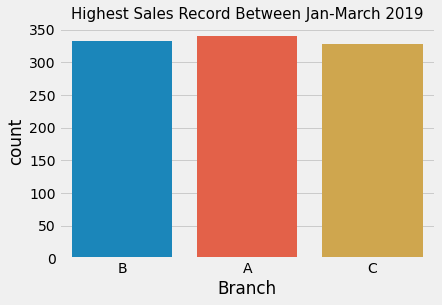

In [49]:
## Determining the branch with the highest sales record
sns.countplot(all_data['Branch'])
plt.title("Highest Sales Record Between Jan-March 2019", size =15)
all_data['Branch'].value_counts()

The sales in branch A is a bit higher but there is no much significant difference across the three branches. 

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

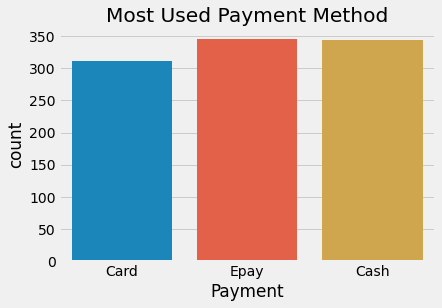

In [50]:
## Determining the most used payment method
sns.countplot(all_data['Payment'])
plt.title("Most Used Payment Method")
all_data['Payment'].value_counts()

Epay is slightly the most used payment methods followed closely by Cash. Card is the least used 

Text(0.5, 1.0, 'City Vs Payment Method')

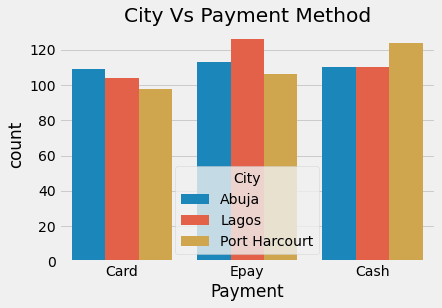

In [51]:
## Exploring Payment and City 
sns.countplot(x = 'Payment', hue = 'City', data = all_data)
plt.title("City Vs Payment Method")

Epay payment Channel tops the list in almost all the cities

Text(0.5, 1.0, 'Total Gross Income Vs Cities Between Jan-March 2019')

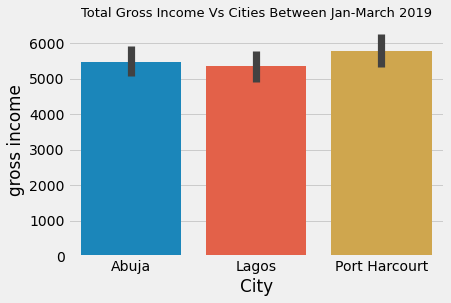

In [52]:
## Uncovering Total gross income for the Cities
sns.barplot(y='gross income', x='City', data=all_data)
plt.title('Total Gross Income Vs Cities Between Jan-March 2019', size=13)

Port Harcout records slightly  higher gross income than the rest

Rating  City         
6.6     Lagos            11
4.2     Lagos            11
6.0     Port Harcourt    10
6.5     Abuja            10
5.1     Abuja            10
                         ..
4.6     Port Harcourt     1
10.0    Lagos             1
9.1     Abuja             1
8.8     Abuja             1
10.0    Port Harcourt     1
Length: 183, dtype: int64

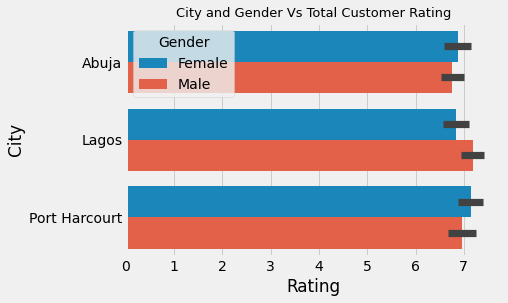

In [53]:
## Finding the City with the highest rating by Gender
sns.barplot(y='City', x='Rating', hue= 'Gender', data=all_data)
plt.title('City and Gender Vs Total Customer Rating', size=13)
all_data.value_counts(['Rating', 'City'])

Lagos has the highest Rating by Males while Port Harcourt has the highest Rating by Females 

Text(0.5, 1.0, 'Product Line Sales Record Between Jan-March 2019')

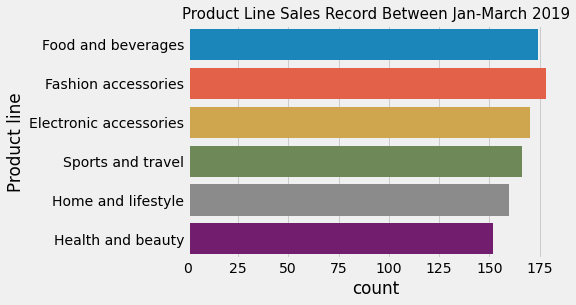

In [54]:
## Discovering the highest & lowest sold product line
sns.countplot(y='Product line', data=all_data)
plt.title('Product Line Sales Record Between Jan-March 2019', size=15)

Fashin and accessories records more sales between January to March 2019

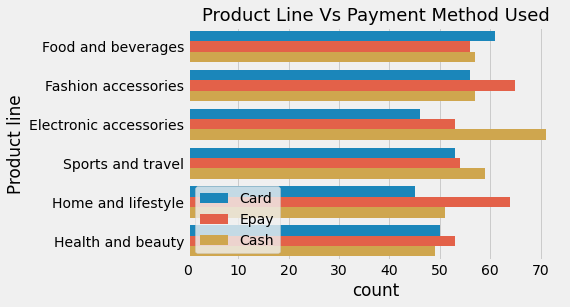

In [55]:
## Observing the Product Line and its corresponding Payment method
sns.countplot(y = 'Product line', hue = 'Payment', data = all_data)
plt.title('Product Line Vs Payment Method Used', size=18)
plt.legend(loc='lower left')

Most of the Paymet of Electronics is by cash but its by Epay in Fashion and Home appliances

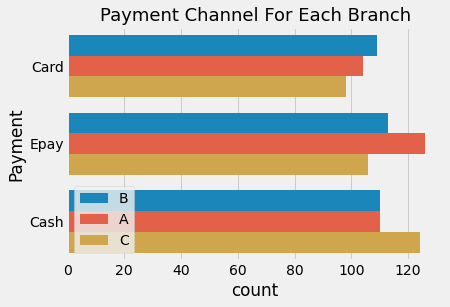

In [56]:
## Determining the Payment channel for each branch
sns.countplot(y = 'Payment', hue = 'Branch', data = all_data)
plt.title('Payment Channel For Each Branch', size=18)
plt.legend(loc='lower left')

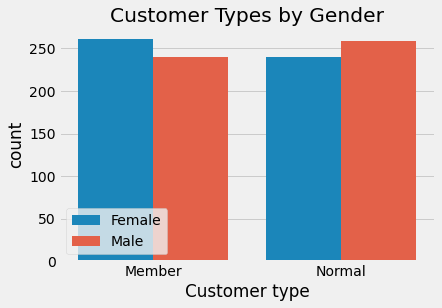

In [57]:
## Checking Customer type by gender
sns.countplot(x='Customer type', hue='Gender', data=all_data)
plt.title('Customer Types by Gender')    
plt.legend(loc='lower left')

Most member customers were Female while Normal customers were Males 

In [5]:
## Discovering Gender in branches 
sns.countplot(x='Gender', hue='Branch', data=all_data)
plt.title('Gender in Branches')
plt.legend(loc='lower left')

NameError: name 'all_data' is not defined

Text(0.5, 1.0, 'Ratings of the Branches')

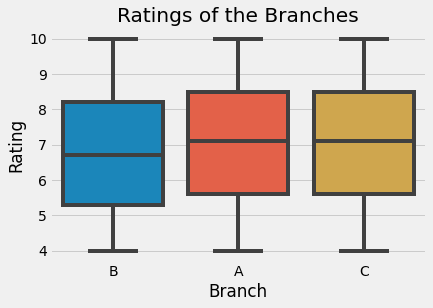

In [59]:
## Finding the branch with lowest rating 
sns.boxplot(x='Branch', y= 'Rating', data=all_data)
plt.title('Ratings of the Branches')

The branch with the lowest rating is B

Text(0.5, 1.0, 'Product Line and thier Quantity Purchased by Gender')

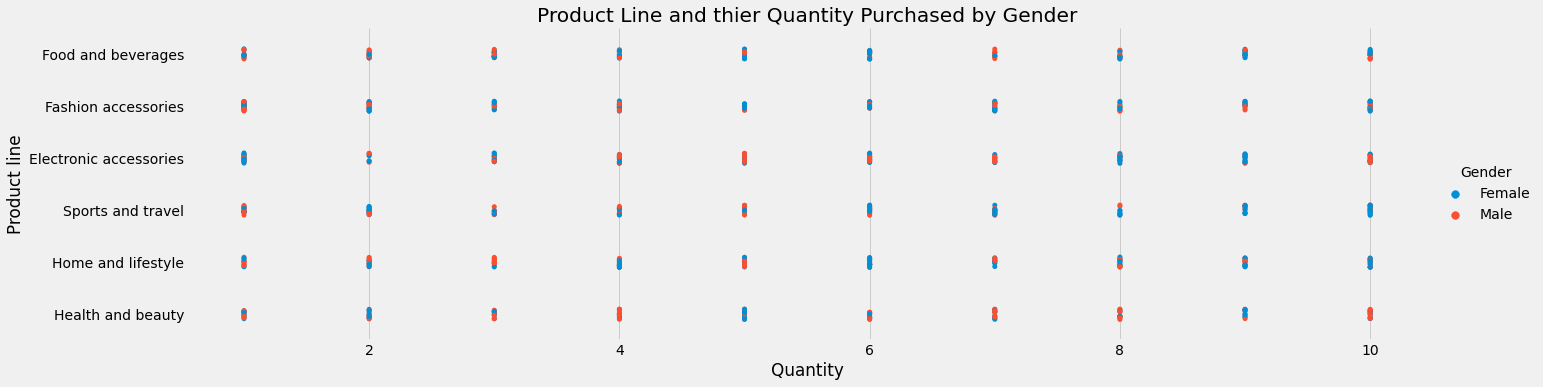

In [60]:
## Plotting the product line and quantity and hue it with gender  
sns.catplot(y='Product line', x='Quantity', hue='Gender', aspect=4, data=all_data)
plt.title('Product Line and thier Quantity Purchased by Gender',)

Text(0.5, 1.0, 'Product Line and Total Price Purchased by Gender')

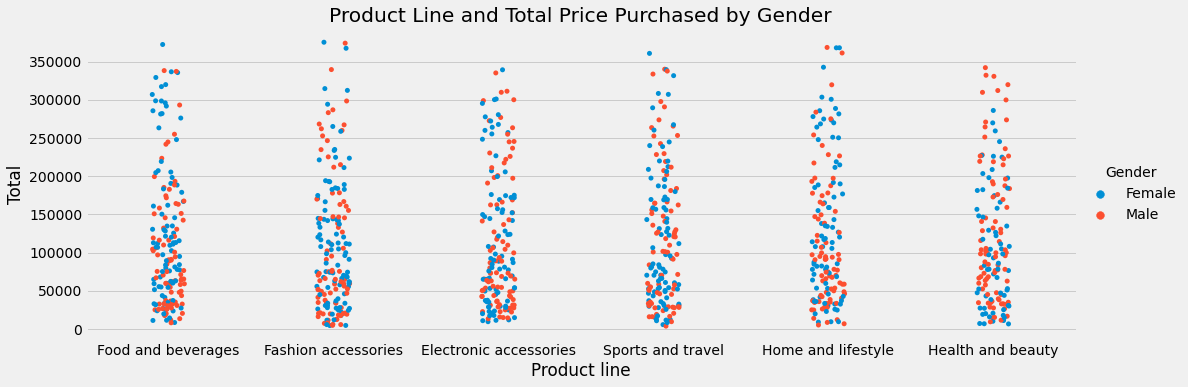

In [61]:
## Plotting the product line and total price and hue it with gender  
sns.catplot(x='Product line', y='Total', hue='Gender', aspect=3, data=all_data)
plt.title('Product Line and Total Price Purchased by Gender')

I observed that many Females purchased and spends much more on Food and beverages and Fashion accessories and also Home and lifestyle than Males.
while Male purchased and spends much on Health and Beauty and Electronic accessories 
The Female purchased more Quantity of goods with lower Unit price while the Male purchased more quantity of goods with higher unit prices


Text(0.5, 1.0, 'Interaction of Product Line on The Total Purchased by Gender')

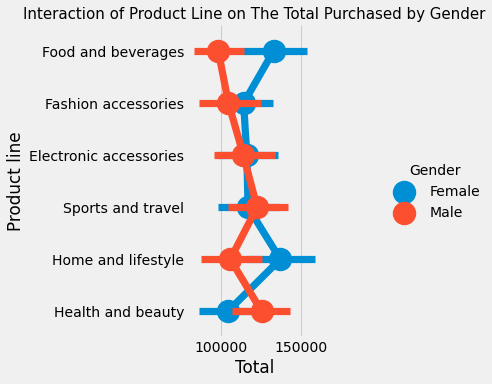

In [62]:
## Exploring interactions 
sns.catplot(y='Product line', x='Total', kind='point', hue='Gender', data=all_data)
plt.title('Interaction of Product Line on The Total Purchased by Gender', size=15)

Text(0.5, 1.0, 'Interaction of Product Line on The Quantity Purchased by Gender')

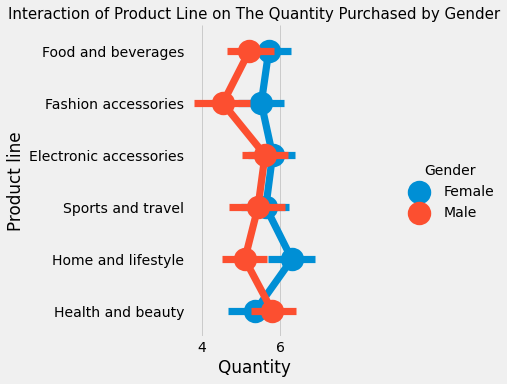

In [63]:
## Exploring interactions
sns.catplot(y='Product line', x='Quantity', kind='point', hue='Gender', data=all_data)
plt.title('Interaction of Product Line on The Quantity Purchased by Gender', size=15)

#### Insight Summary 
From  the charts above we observed that;
Many Females purchased in bulk quantity the following 
Food & beverages, Sport & Travels and Home & Lifestyle
Male purchased in bulk quantity the following Electronic accessories and Health and Beauty
The Female purchased more quantity of goods with lower Unit price.
The Male purchased more quantity of goods with higher unit prices. 
Females usually spends much more on Food & Beverages, Fashion accessories and also Home & Lifestyle.
Males money mostly goes to Health & Beauty

Text(0.5, 1.0, 'Gross Income By Product Line')

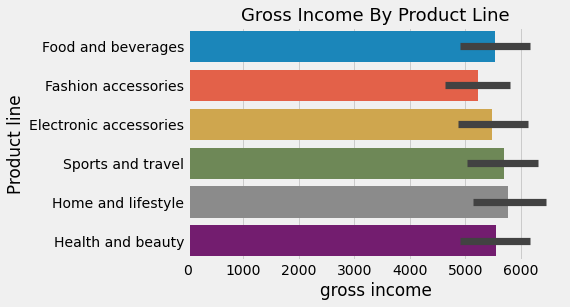

In [64]:
## Plotting Gross income by Product line 
sns.barplot(x='gross income', y='Product line', data=all_data)
plt.title('Gross Income By Product Line', size=18)

Home and Lifestyle contributed the most to the Gross income 

Text(0.5, 1.0, 'Relationship Between Product line & Time of purchase in Branches')

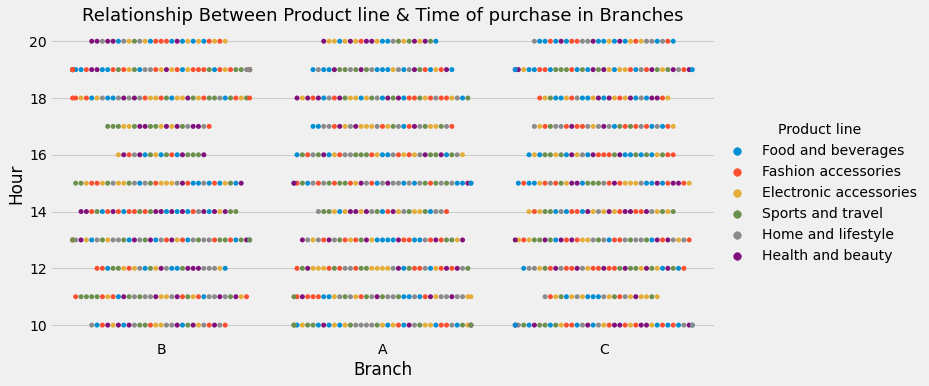

In [65]:
## Finding the relationship between Product line and Time of purchase in each Branch
sns.catplot(x='Branch', y='Hour', hue='Product line', kind='swarm', aspect=2, data=all_data)
plt.title('Relationship Between Product line & Time of purchase in Branches', size=18)

Text(0.5, 1.0, 'Rating of Services By Customer Typein Branches')

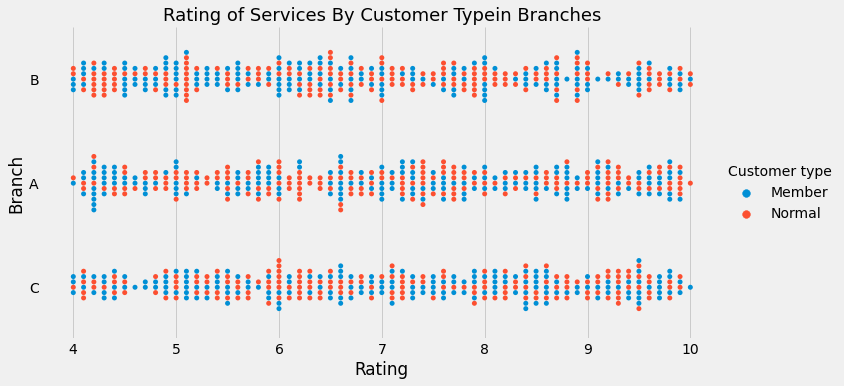

In [66]:
## The relationship between Rating and Customer type in each Branch
sns.catplot(x='Rating', y='Branch', hue='Customer type', kind='swarm', aspect=2, data=all_data)
plt.title('Rating of Services By Customer Type in Branches', size=18)